🌾 Agricultural Crop Production Prediction System
Sample dataset created successfully!
Dataset shape: (1000, 8)
=== DATASET OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop        1000 non-null   object 
 1   Variety     1000 non-null   object 
 2   State       1000 non-null   object 
 3   Season      1000 non-null   object 
 4   Quantity    1000 non-null   int32  
 5   Cost        1000 non-null   int32  
 6   Year        1000 non-null   int32  
 7   Production  1000 non-null   float64
dtypes: float64(1), int32(3), object(4)
memory usage: 50.9+ KB
None

=== BASIC STATISTICS ===
          Quantity          Cost         Year    Production
count  1000.000000   1000.000000  1000.000000  1.000000e+03
mean   4966.897000  27474.439000  2007.683000  7.739160e+04
std    2772.493269  12874.753693     3.994805  2.041368e+05
min     106.000

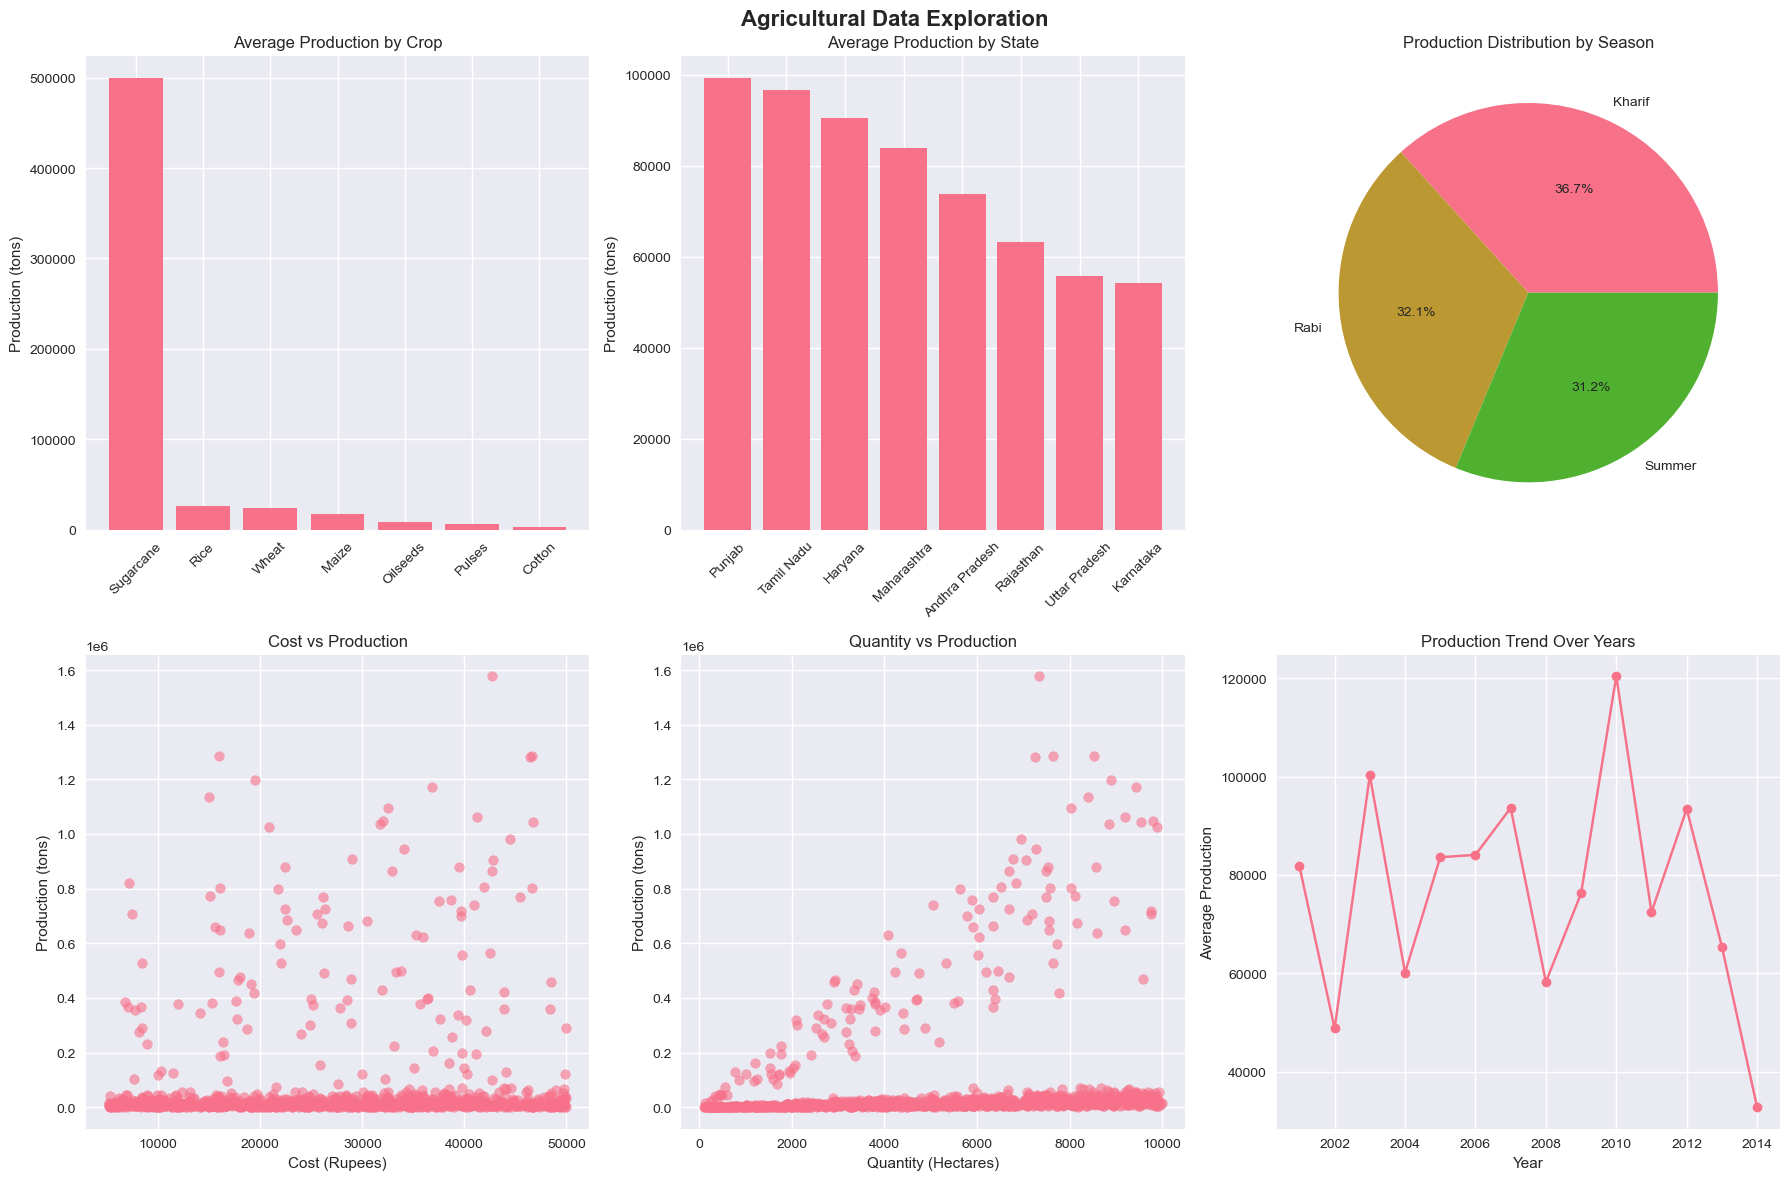

=== DATA PREPROCESSING ===
Data preprocessing completed!
Final dataset shape: (1000, 14)
Features prepared: ['Quantity', 'Cost', 'Year', 'Cost_per_Hectare', 'Crop_encoded', 'Variety_encoded', 'State_encoded', 'Season_encoded']
Training set: (800, 8), Test set: (200, 8)
=== MODEL TRAINING ===
Training Linear Regression...
Linear Regression - RMSE: 182813.69, R2: 0.165, CV Score: 0.138 ± 0.038
Training Decision Tree...
Decision Tree - RMSE: 93220.26, R2: 0.783, CV Score: 0.892 ± 0.047
Training Random Forest...
Random Forest - RMSE: 49717.85, R2: 0.938, CV Score: 0.929 ± 0.030

=== MODEL EVALUATION ===
               Model           RMSE  R2_Score            MAE   CV_Mean  \
0  Linear Regression  182813.686803  0.164805  105945.143150  0.138216   
1      Decision Tree   93220.263500  0.782834   24680.787426  0.891905   
2      Random Forest   49717.851845  0.938227   15205.722620  0.928819   

     CV_Std  
0  0.038069  
1  0.046803  
2  0.030291  


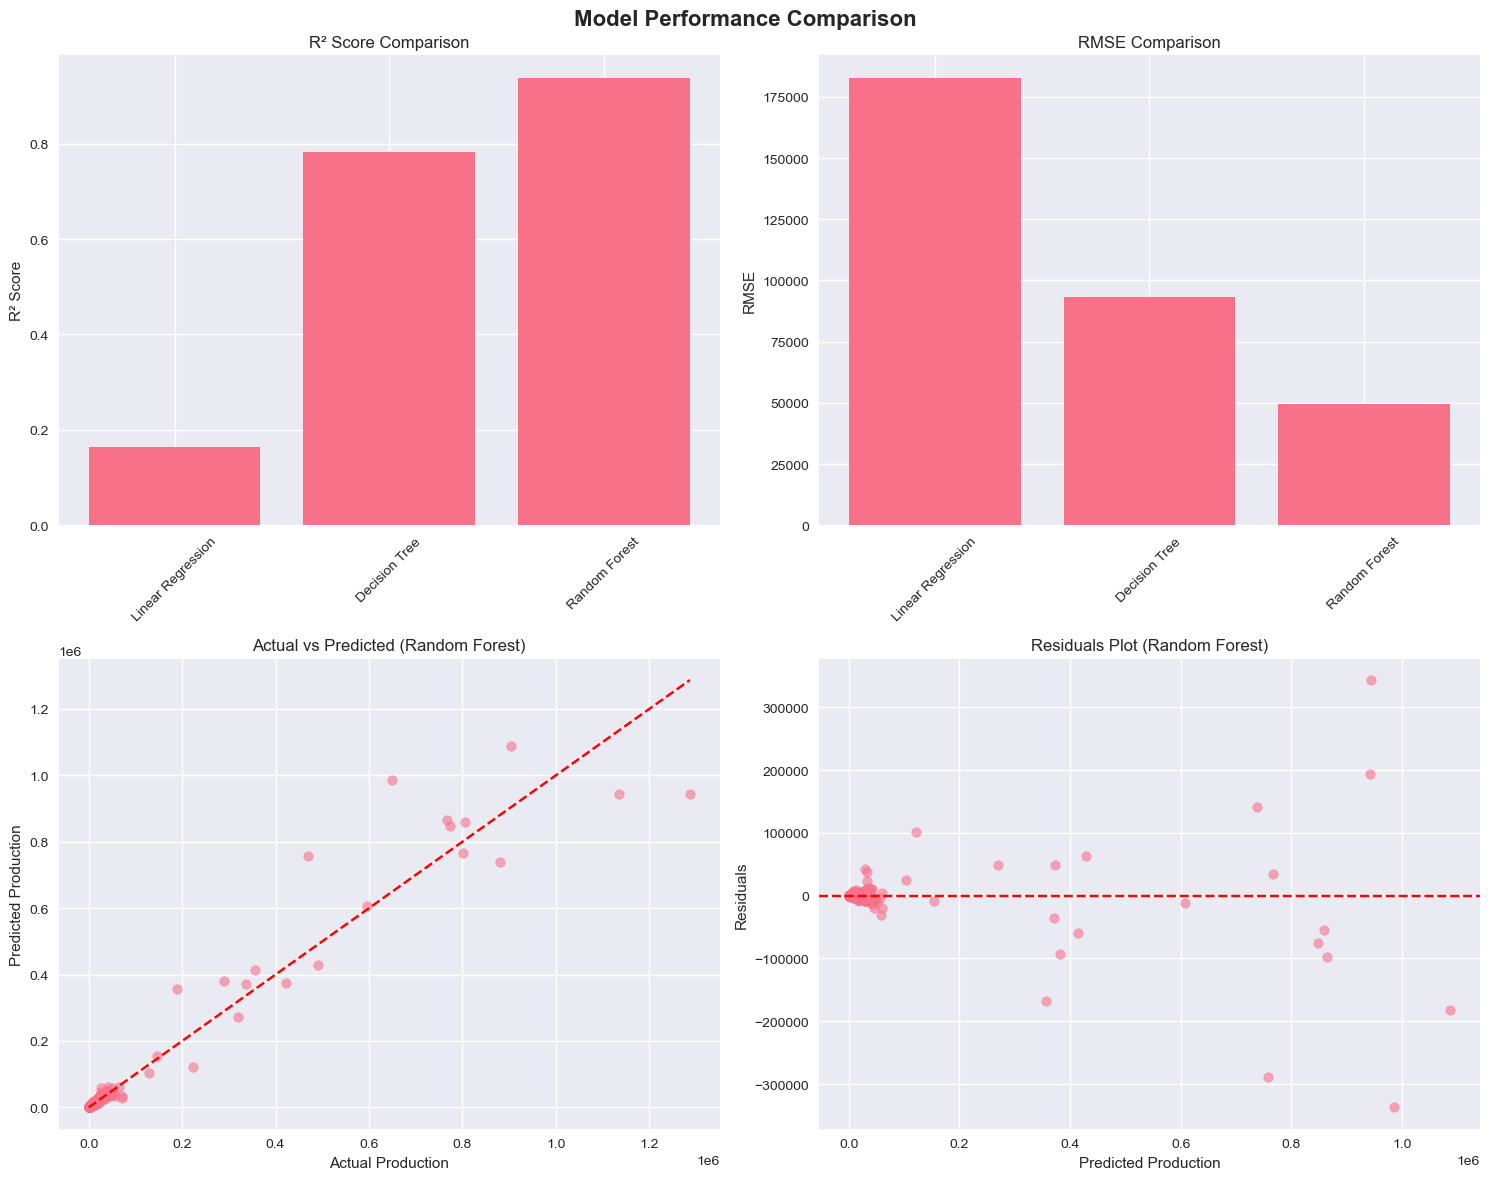


=== FEATURE IMPORTANCE ===

Decision Tree Feature Importance:
            Feature  Importance
4      Crop_encoded    0.636266
0          Quantity    0.282430
1              Cost    0.032284
7    Season_encoded    0.018648
3  Cost_per_Hectare    0.013436
5   Variety_encoded    0.011918
2              Year    0.003577
6     State_encoded    0.001441

Random Forest Feature Importance:
            Feature  Importance
4      Crop_encoded    0.637895
0          Quantity    0.289477
1              Cost    0.029101
7    Season_encoded    0.016684
3  Cost_per_Hectare    0.009891
2              Year    0.006651
5   Variety_encoded    0.005269
6     State_encoded    0.005032


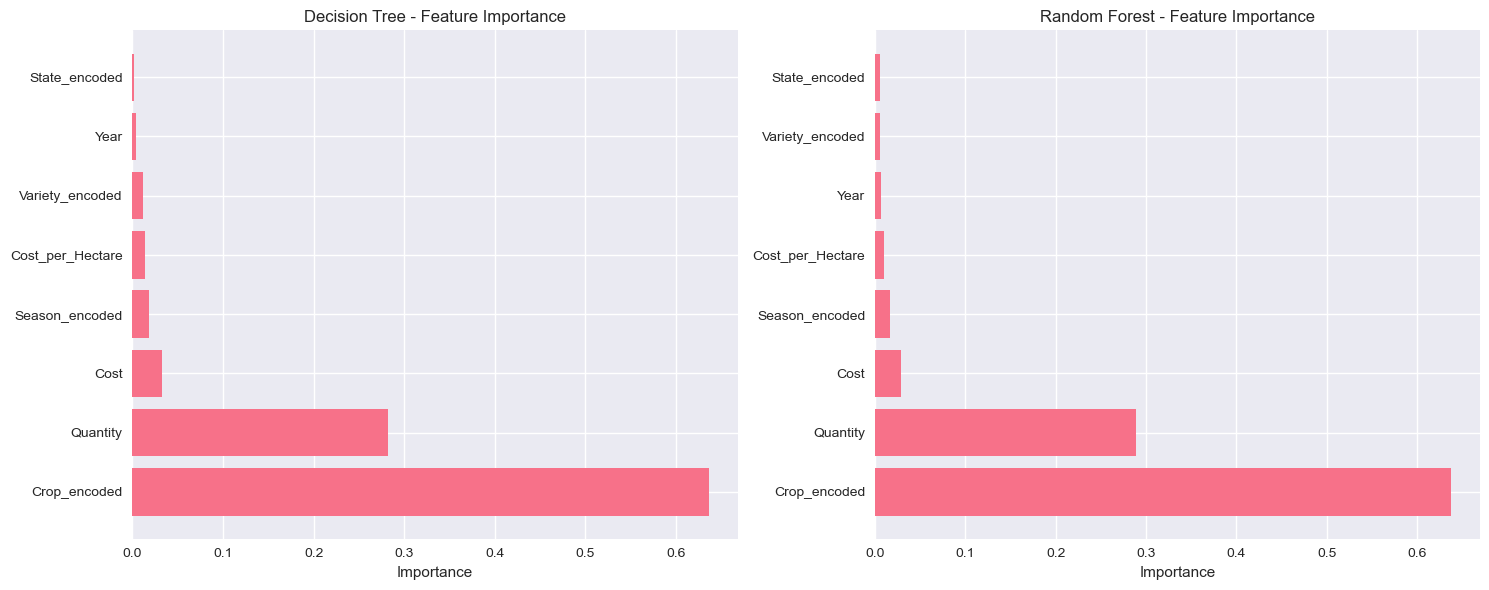


AGRICULTURAL CROP PRODUCTION PREDICTION REPORT

1. DATASET SUMMARY:
   • Total records: 1000
   • Features: 14
   • Time period: 2001 - 2014
   • Crops analyzed: Oilseeds, Cotton, Maize, Sugarcane, Wheat, Pulses, Rice
   • States covered: Punjab, Karnataka, Andhra Pradesh, Tamil Nadu, Rajasthan, Maharashtra, Uttar Pradesh, Haryana

2. MODEL PERFORMANCE:
   • Best Model: Random Forest
   • R² Score: 0.938
   • RMSE: 49717.85
   • Cross-validation Score: 0.929 ± 0.030

3. KEY INSIGHTS:
   • Highest producing crop: Sugarcane
   • Most productive state: Punjab
   • Cost-production correlation: 0.062

4. RECOMMENDATIONS:
   • Focus investment in high-performing crops and states
   • Consider seasonal variations in production planning
   • Optimize cost-to-production ratios
   • Use model predictions for future crop planning

🎉 Project completed successfully!

📊 Example Prediction:
Using Random Forest for predictions...
Predicted production: 4553.87 tons


In [1]:
# Agricultural Crop Production Prediction in India
# Complete Data Science Project Implementation
# Author: Soham Jadhav
# Project: Prediction of Agriculture Crop Production in India (2001-2014)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class AgriculturePredictor:
    """
    A comprehensive class for predicting agricultural crop production in India
    """
    
    def __init__(self):
        self.data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.scalers = {}
        self.encoders = {}
        self.results = {}
        
    def create_sample_data(self):
        """
        Create sample agricultural data similar to the described dataset
        """
        np.random.seed(42)
        n_samples = 1000
        
        # Sample crops and states
        crops = ['Rice', 'Wheat', 'Sugarcane', 'Cotton', 'Maize', 'Pulses', 'Oilseeds']
        states = ['Punjab', 'Haryana', 'Uttar Pradesh', 'Maharashtra', 'Karnataka', 
                 'Andhra Pradesh', 'Tamil Nadu', 'Rajasthan']
        seasons = ['Kharif', 'Rabi', 'Summer']
        varieties = ['High Yield', 'Drought Resistant', 'Traditional', 'Hybrid']
        
        # Generate synthetic data
        data = {
            'Crop': np.random.choice(crops, n_samples),
            'Variety': np.random.choice(varieties, n_samples),
            'State': np.random.choice(states, n_samples),
            'Season': np.random.choice(seasons, n_samples),
            'Quantity': np.random.randint(100, 10000, n_samples),  # Hectares
            'Cost': np.random.randint(5000, 50000, n_samples),     # Cost in Rupees
            'Year': np.random.randint(2001, 2015, n_samples)
        }
        
        # Create realistic production based on other factors
        production_base = {
            'Rice': 3500, 'Wheat': 3000, 'Sugarcane': 70000, 
            'Cotton': 500, 'Maize': 2500, 'Pulses': 800, 'Oilseeds': 1200
        }
        
        state_factor = {
            'Punjab': 1.2, 'Haryana': 1.1, 'Uttar Pradesh': 0.9, 
            'Maharashtra': 1.0, 'Karnataka': 0.95, 'Andhra Pradesh': 1.05,
            'Tamil Nadu': 1.0, 'Rajasthan': 0.8
        }
        
        season_factor = {'Kharif': 1.1, 'Rabi': 1.2, 'Summer': 0.8}
        variety_factor = {'High Yield': 1.3, 'Drought Resistant': 1.1, 'Traditional': 0.9, 'Hybrid': 1.2}
        
        # Calculate production with some noise
        production = []
        for i in range(n_samples):
            base_prod = production_base[data['Crop'][i]]
            state_mult = state_factor[data['State'][i]]
            season_mult = season_factor[data['Season'][i]]
            variety_mult = variety_factor[data['Variety'][i]]
            quantity_effect = (data['Quantity'][i] / 1000)
            cost_effect = (data['Cost'][i] / 10000) * 0.1
            
            prod = base_prod * state_mult * season_mult * variety_mult * quantity_effect * (1 + cost_effect)
            # Add some random noise
            prod = prod * np.random.normal(1, 0.15)
            production.append(max(0, prod))
        
        data['Production'] = production
        
        self.data = pd.DataFrame(data)
        print("Sample dataset created successfully!")
        print(f"Dataset shape: {self.data.shape}")
        return self.data
    
    def load_data(self, file_path=None):
        """
        Load data from file or create sample data
        """
        if file_path:
            try:
                self.data = pd.read_csv(file_path)
                print(f"Data loaded from {file_path}")
            except FileNotFoundError:
                print("File not found. Creating sample data instead.")
                self.create_sample_data()
        else:
            self.create_sample_data()
        
        return self.data
    
    def explore_data(self):
        """
        Perform comprehensive exploratory data analysis
        """
        print("=== DATASET OVERVIEW ===")
        print(self.data.info())
        print("\n=== BASIC STATISTICS ===")
        print(self.data.describe())
        print("\n=== MISSING VALUES ===")
        print(self.data.isnull().sum())
        
        # Create visualizations
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Agricultural Data Exploration', fontsize=16, fontweight='bold')
        
        # 1. Production by Crop
        crop_production = self.data.groupby('Crop')['Production'].mean().sort_values(ascending=False)
        axes[0,0].bar(crop_production.index, crop_production.values)
        axes[0,0].set_title('Average Production by Crop')
        axes[0,0].set_ylabel('Production (tons)')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # 2. Production by State
        state_production = self.data.groupby('State')['Production'].mean().sort_values(ascending=False)
        axes[0,1].bar(state_production.index, state_production.values)
        axes[0,1].set_title('Average Production by State')
        axes[0,1].set_ylabel('Production (tons)')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. Production by Season
        season_production = self.data.groupby('Season')['Production'].mean()
        axes[0,2].pie(season_production.values, labels=season_production.index, autopct='%1.1f%%')
        axes[0,2].set_title('Production Distribution by Season')
        
        # 4. Cost vs Production scatter
        axes[1,0].scatter(self.data['Cost'], self.data['Production'], alpha=0.6)
        axes[1,0].set_xlabel('Cost (Rupees)')
        axes[1,0].set_ylabel('Production (tons)')
        axes[1,0].set_title('Cost vs Production')
        
        # 5. Quantity vs Production scatter
        axes[1,1].scatter(self.data['Quantity'], self.data['Production'], alpha=0.6)
        axes[1,1].set_xlabel('Quantity (Hectares)')
        axes[1,1].set_ylabel('Production (tons)')
        axes[1,1].set_title('Quantity vs Production')
        
        # 6. Production trend over years
        yearly_production = self.data.groupby('Year')['Production'].mean()
        axes[1,2].plot(yearly_production.index, yearly_production.values, marker='o')
        axes[1,2].set_xlabel('Year')
        axes[1,2].set_ylabel('Average Production')
        axes[1,2].set_title('Production Trend Over Years')
        
        plt.tight_layout()
        plt.show()
        
        return self.data.describe()
    
    def preprocess_data(self):
        """
        Clean and preprocess the data for modeling
        """
        print("=== DATA PREPROCESSING ===")
        
        # Handle missing values
        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        categorical_columns = self.data.select_dtypes(include=['object']).columns
        
        # Impute missing numeric values
        if self.data[numeric_columns].isnull().any().any():
            numeric_imputer = SimpleImputer(strategy='median')
            self.data[numeric_columns] = numeric_imputer.fit_transform(self.data[numeric_columns])
        
        # Impute missing categorical values
        if self.data[categorical_columns].isnull().any().any():
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            self.data[categorical_columns] = categorical_imputer.fit_transform(self.data[categorical_columns])
        
        # Encode categorical variables
        categorical_features = ['Crop', 'Variety', 'State', 'Season']
        
        for feature in categorical_features:
            if feature in self.data.columns:
                le = LabelEncoder()
                self.data[f'{feature}_encoded'] = le.fit_transform(self.data[feature])
                self.encoders[feature] = le
        
        # Feature engineering
        self.data['Cost_per_Hectare'] = self.data['Cost'] / self.data['Quantity']
        self.data['Production_per_Hectare'] = self.data['Production'] / self.data['Quantity']
        
        print("Data preprocessing completed!")
        print(f"Final dataset shape: {self.data.shape}")
        
        return self.data
    
    def prepare_features(self):
        """
        Prepare features and target for modeling
        """
        # Define feature columns
        feature_columns = [
            'Quantity', 'Cost', 'Year', 'Cost_per_Hectare',
            'Crop_encoded', 'Variety_encoded', 'State_encoded', 'Season_encoded'
        ]
        
        # Check which columns exist
        available_features = [col for col in feature_columns if col in self.data.columns]
        
        X = self.data[available_features]
        y = self.data['Production']
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale features
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)
        self.scalers['features'] = scaler
        
        print(f"Features prepared: {available_features}")
        print(f"Training set: {self.X_train.shape}, Test set: {self.X_test.shape}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def train_models(self):
        """
        Train multiple regression models
        """
        print("=== MODEL TRAINING ===")
        
        # Initialize models
        models = {
            'Linear Regression': LinearRegression(),
            'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
            'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
        }
        
        # Train models
        for name, model in models.items():
            print(f"Training {name}...")
            
            # Train on scaled data for Linear Regression, original for tree-based
            if name == 'Linear Regression':
                model.fit(self.X_train_scaled, self.y_train)
                y_pred = model.predict(self.X_test_scaled)
            else:
                model.fit(self.X_train, self.y_train)
                y_pred = model.predict(self.X_test)
            
            # Calculate metrics
            mse = mean_squared_error(self.y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(self.y_test, y_pred)
            mae = mean_absolute_error(self.y_test, y_pred)
            
            # Cross-validation
            if name == 'Linear Regression':
                cv_scores = cross_val_score(model, self.X_train_scaled, self.y_train, cv=5, scoring='r2')
            else:
                cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=5, scoring='r2')
            
            self.models[name] = model
            self.results[name] = {
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae,
                'CV_Mean': cv_scores.mean(),
                'CV_Std': cv_scores.std(),
                'Predictions': y_pred
            }
            
            print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.3f}, CV Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
        
        return self.models, self.results
    
    def evaluate_models(self):
        """
        Comprehensive model evaluation with visualizations
        """
        print("\n=== MODEL EVALUATION ===")
        
        # Create comparison DataFrame
        comparison_data = []
        for name, metrics in self.results.items():
            comparison_data.append({
                'Model': name,
                'RMSE': metrics['RMSE'],
                'R2_Score': metrics['R2'],
                'MAE': metrics['MAE'],
                'CV_Mean': metrics['CV_Mean'],
                'CV_Std': metrics['CV_Std']
            })
        
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df)
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
        
        # 1. R2 Score comparison
        axes[0,0].bar(comparison_df['Model'], comparison_df['R2_Score'])
        axes[0,0].set_title('R² Score Comparison')
        axes[0,0].set_ylabel('R² Score')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # 2. RMSE comparison
        axes[0,1].bar(comparison_df['Model'], comparison_df['RMSE'])
        axes[0,1].set_title('RMSE Comparison')
        axes[0,1].set_ylabel('RMSE')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. Actual vs Predicted for best model
        best_model_name = comparison_df.loc[comparison_df['R2_Score'].idxmax(), 'Model']
        best_predictions = self.results[best_model_name]['Predictions']
        
        axes[1,0].scatter(self.y_test, best_predictions, alpha=0.6)
        axes[1,0].plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], 'r--')
        axes[1,0].set_xlabel('Actual Production')
        axes[1,0].set_ylabel('Predicted Production')
        axes[1,0].set_title(f'Actual vs Predicted ({best_model_name})')
        
        # 4. Residuals plot
        residuals = self.y_test - best_predictions
        axes[1,1].scatter(best_predictions, residuals, alpha=0.6)
        axes[1,1].axhline(y=0, color='r', linestyle='--')
        axes[1,1].set_xlabel('Predicted Production')
        axes[1,1].set_ylabel('Residuals')
        axes[1,1].set_title(f'Residuals Plot ({best_model_name})')
        
        plt.tight_layout()
        plt.show()
        
        return comparison_df
    
    def get_feature_importance(self):
        """
        Get feature importance from tree-based models
        """
        print("\n=== FEATURE IMPORTANCE ===")
        
        # Get feature names
        feature_names = self.X_train.columns
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        for idx, (name, model) in enumerate([('Decision Tree', self.models['Decision Tree']), 
                                           ('Random Forest', self.models['Random Forest'])]):
            if hasattr(model, 'feature_importances_'):
                importance = model.feature_importances_
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance': importance
                }).sort_values('Importance', ascending=False)
                
                axes[idx].barh(importance_df['Feature'], importance_df['Importance'])
                axes[idx].set_title(f'{name} - Feature Importance')
                axes[idx].set_xlabel('Importance')
                
                print(f"\n{name} Feature Importance:")
                print(importance_df)
        
        plt.tight_layout()
        plt.show()
    
    def make_predictions(self, input_data):
        """
        Make predictions on new data
        """
        best_model_name = max(self.results, key=lambda x: self.results[x]['R2'])
        best_model = self.models[best_model_name]
        
        print(f"Using {best_model_name} for predictions...")
        
        # Prepare input data (encode categorical variables)
        processed_input = input_data.copy()
        
        for feature, encoder in self.encoders.items():
            if feature in processed_input.columns:
                processed_input[f'{feature}_encoded'] = encoder.transform(processed_input[feature])
        
        # Add engineered features
        processed_input['Cost_per_Hectare'] = processed_input['Cost'] / processed_input['Quantity']
        
        # Select same features used in training
        feature_columns = self.X_train.columns
        X_pred = processed_input[feature_columns]
        
        # Make prediction
        if best_model_name == 'Linear Regression':
            X_pred_scaled = self.scalers['features'].transform(X_pred)
            predictions = best_model.predict(X_pred_scaled)
        else:
            predictions = best_model.predict(X_pred)
        
        return predictions
    
    def generate_report(self):
        """
        Generate a comprehensive project report
        """
        print("\n" + "="*50)
        print("AGRICULTURAL CROP PRODUCTION PREDICTION REPORT")
        print("="*50)
        
        print(f"\n1. DATASET SUMMARY:")
        print(f"   • Total records: {len(self.data)}")
        print(f"   • Features: {self.data.shape[1]}")
        print(f"   • Time period: {self.data['Year'].min()} - {self.data['Year'].max()}")
        print(f"   • Crops analyzed: {', '.join(self.data['Crop'].unique())}")
        print(f"   • States covered: {', '.join(self.data['State'].unique())}")
        
        print(f"\n2. MODEL PERFORMANCE:")
        best_model = max(self.results, key=lambda x: self.results[x]['R2'])
        best_r2 = self.results[best_model]['R2']
        best_rmse = self.results[best_model]['RMSE']
        
        print(f"   • Best Model: {best_model}")
        print(f"   • R² Score: {best_r2:.3f}")
        print(f"   • RMSE: {best_rmse:.2f}")
        print(f"   • Cross-validation Score: {self.results[best_model]['CV_Mean']:.3f} ± {self.results[best_model]['CV_Std']:.3f}")
        
        print(f"\n3. KEY INSIGHTS:")
        top_crop = self.data.groupby('Crop')['Production'].mean().idxmax()
        top_state = self.data.groupby('State')['Production'].mean().idxmax()
        
        print(f"   • Highest producing crop: {top_crop}")
        print(f"   • Most productive state: {top_state}")
        print(f"   • Cost-production correlation: {self.data['Cost'].corr(self.data['Production']):.3f}")
        
        print(f"\n4. RECOMMENDATIONS:")
        print("   • Focus investment in high-performing crops and states")
        print("   • Consider seasonal variations in production planning")
        print("   • Optimize cost-to-production ratios")
        print("   • Use model predictions for future crop planning")


def main():
    """
    Main function to run the complete project
    """
    print("🌾 Agricultural Crop Production Prediction System")
    print("=" * 50)
    
    # Initialize predictor
    predictor = AgriculturePredictor()
    
    # Load and explore data
    data = predictor.load_data()
    predictor.explore_data()
    
    # Preprocess data
    predictor.preprocess_data()
    
    # Prepare features and train models
    predictor.prepare_features()
    predictor.train_models()
    
    # Evaluate models
    predictor.evaluate_models()
    predictor.get_feature_importance()
    
    # Generate final report
    predictor.generate_report()
    
    print("\n🎉 Project completed successfully!")
    
    # Example prediction
    print("\n📊 Example Prediction:")
    sample_input = pd.DataFrame({
        'Crop': ['Rice'],
        'Variety': ['High Yield'],
        'State': ['Punjab'],
        'Season': ['Kharif'],
        'Quantity': [1000],
        'Cost': [25000],
        'Year': [2014]
    })
    
    prediction = predictor.make_predictions(sample_input)
    print(f"Predicted production: {prediction[0]:.2f} tons")
    
    return predictor

if __name__ == "__main__":
    # Run the complete project
    agriculture_predictor = main()